In [0]:
!pip install --upgrade --user ortools
!pip install networkx

     |████████████████████████████████| 28.9MB 145kB/s 
     |████████████████████████████████| 1.3MB 48.7MB/s 


x0 = red
x1 = green
x2 = red
x3 = green
x4 = blue
x5 = blue
x6 = green
x7 = blue
x8 = red
x9 = red

Stop search after 1 solutions
Solution found : 1


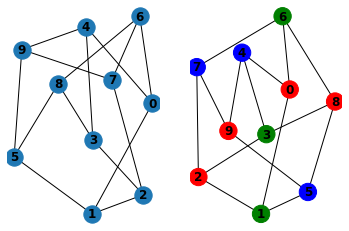

In [0]:
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt
import networkx as nx

class SolutionPrinter(cp_model.CpSolverSolutionCallback):
  """Print intermediate solutions."""

  def __init__(self, variables, limit):
    cp_model.CpSolverSolutionCallback.__init__(self)
    self.__variables = variables
    self.__solution_count = 0
    self.__solution_limit = limit
    self.colors = ["red", "blue", "green"]
    self.node_colors = []

  def OnSolutionCallback(self):
    self.__solution_count += 1
    for v in self.__variables:
      print('{} = {}'.format(v, self.colors[self.Value(v)]), end = '\n')
      self.node_colors.append(self.colors[self.Value(v)])
    print()
    if self.__solution_count >= self.__solution_limit:
      print('Stop search after {} solutions'.format(self.__solution_limit))
      self.StopSearch()

  def SolutionCount(self):
    return self.__solution_count, self.node_colors

def graph_coloring(num_nodes, connections, k, num_solutions=2):
  model = cp_model.CpModel()

  nodes = [model.NewIntVar(0, k-1, 'x%i' %i) for i in range(num_nodes)]

  for i, conn in enumerate(connections):
    model.Add(nodes[conn[0]] != nodes[conn[1]])
  
  solver = cp_model.CpSolver()
  solution_printer = SolutionPrinter(nodes, num_solutions)
  status = solver.SearchForAllSolutions(model, solution_printer)
  count, colors = solution_printer.SolutionCount()
  print("Solution found : %i" % count)
  return colors

num_nodes = 10
domain = 3
connections = [
               (0, 1),
               (1, 2),
               (2, 3),
               (3, 4),
               (0, 4),
               (1, 5),
               (0, 6),
               (2, 7),
               (3, 8),
               (4, 9),
               (5, 9),
               (5, 8),
               (6, 7),
               (6, 8),
               (7, 9)
]
num_solutions = 1
g1 = nx.Graph()
for conn in connections:
  g1.add_edge(conn[0], conn[1], color="black")
plt.subplot(121)
nx.draw(g1, with_labels=True, font_weight='bold') 
plt.savefig("raw.png")
colors = graph_coloring(num_nodes, connections, domain, num_solutions)
plt.subplot(122)
assign_colors = []
for node in g1.nodes():
  assign_colors.append(colors[node])
nx.draw(g1,node_color = assign_colors, with_labels=True, font_weight='bold')
plt.savefig("processed.png")